# **Distribución Weibull**

**Analiticamente**

$$
f(x)=\frac{α}{β^α}x^{α-1}e^{-\left(\frac{x}{β}\right)^α}
$$

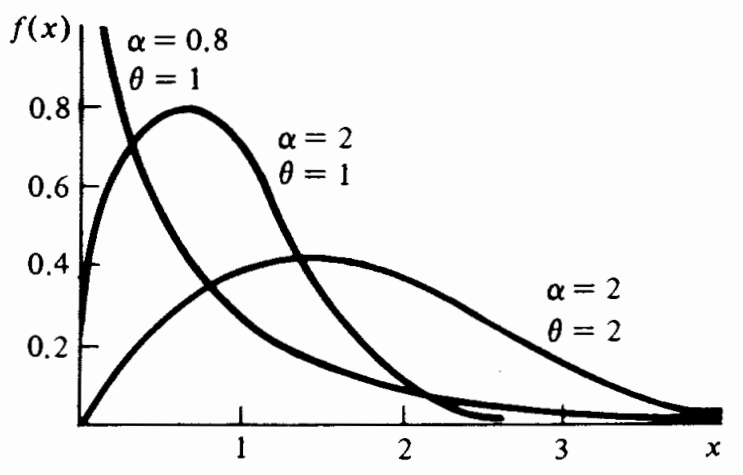

**Simulación**

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable
from scipy.stats import norm

**Paso 1.** Defina las variables que intervienen en el modelo.

Definimos $α$, como el parametro de forma y $β$ el de escala. Se dice que una variable aleatoria $x$ tiene una distribución de Weibull si su función de densidad de probabilidad está dada por:

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x) = \left\{
            \begin{array}{ll}
	      \frac{α}{β^α}x^{α-1}e^{-\left(\frac{x}{β}\right)^α} & \mathrm{si\ } x>0;\hspace{1cm}α,β>0 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x)=1-e^{-\left(\frac{x}{β}\right)^α},\hspace{1cm}x\geq 0
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |   x   |
|-----------|-------|
| Intervalo | (0,∞) |

In [28]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función y obtener el porcentaje de aceptación.

def w(x, a, b):
    # Retorna el valor de la función de densidad de probabilidad de la distribución Weibull
    return (a / b**a) * (x**(a - 1)) * np.exp(-(x / b)**a)

# Parámetros
a = 1.5  # Parámetro de forma de la distribución Weibull
b = 2.0  # Parámetro de escala de la distribución Weibull
n = 50000  # Número de iteraciones de la simulación
delta = 0.1  # Paso máximo permitido para el movimiento en la cadena de Markov
x = np.zeros(n)  # Inicializamos un array de ceros donde almacenaremos las muestras
x[0] = 10  # Valor inicial para la cadena de Markov
acept = 0  # Contador para las aceptaciones

# Bucle para generar muestras mediante el algoritmo de Metropolis-Hastings
for i in range(0, n-1):
    # Propuesta de nuevo valor y usando una distribución uniforme en el intervalo (-delta, delta)
    y = x[i] + np.random.uniform(-delta, delta)

    # Aceptación del nuevo valor usando el criterio de Metropolis-Hastings
    if y > 0 and np.random.rand() < min(1, w(y, a, b) / w(x[i], a, b)):
        x[i+1] = y  # Si el valor es aceptado, se almacena en la siguiente posición
        acept += 1  # Aumenta el contador de aceptaciones
    else:
        x[i+1] = x[i]  # Si no es aceptado, se repite el valor anterior

# Imprimir el porcentaje de aceptación del algoritmo
print("La aceptación fue del ", acept/n*100, "%")

La aceptación fue del  98.042 %


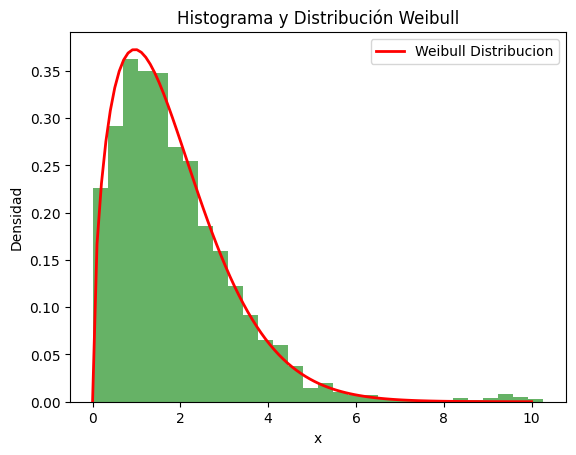

In [29]:
# PASO 7. Obtenga la gráfica y el histograma.

# Graficar histograma y la función Weibull
plt.hist(x, bins=30, density=True, alpha=0.6, color='g')

# Crear el rango para la función Weibull
xs = np.linspace(0, 10, 100)

# Graficar la función Weibull
plt.plot(xs, w(xs, a, b), 'r-', lw=2, label='Weibull Distribucion')

plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Histograma y Distribución Weibull')
plt.legend()
plt.show()

In [30]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

media_f = b*math.gamma(1+(1/a))
desviacion_f = math.sqrt(b**2*(math.gamma(1+(2/a))-math.gamma(1+(1/a))**2))
print("Media analítica:", media_f)
print("Desviación estandar analítica:", desviacion_f)
print("La media es:", np.mean(x))
print("La desviación estandar es:", np.std(x))

Media analítica: 1.8054905859018673
Desviación estandar analítica: 1.2258715835093523
La media es: 1.8946150206967425
La desviación estandar es: 1.4332508701761957


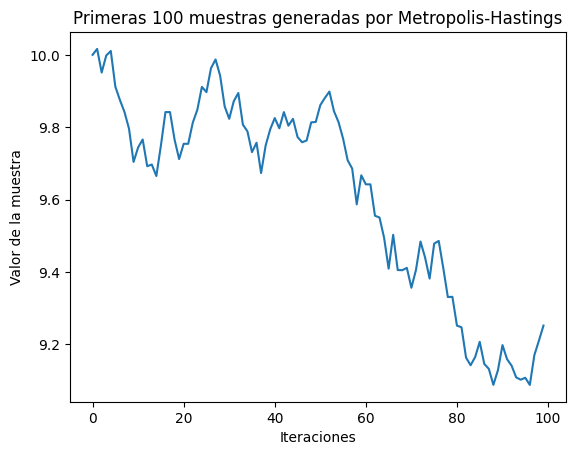

In [31]:
# Gráfico de los primeros 100 valores generados
plt.plot(x[:100])
plt.title('Primeras 100 muestras generadas por Metropolis-Hastings')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la muestra')
plt.show()

# **Distribución gamma**

**Analiticamente**

$$
f(x)=\frac{1}{𝛤(α)ϴ^α}x^{α-1}e^{-\frac{x}{ϴ}}
$$
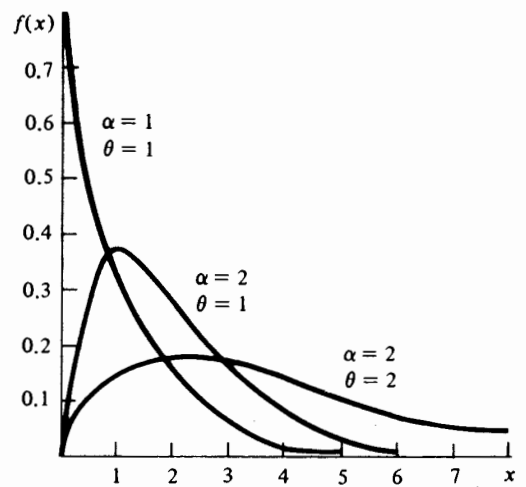

**Simulación**

**Paso 1.** Defina las variables que intervienen en el modelo.

Definimos $α$, como el parametro de forma y $ϴ$ el de escala. Se dice que una variable aleatoria $x$ tiene una distribución Gamma si su función de densidad de probabilidad está dada por:

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x) = \left\{
            \begin{array}{ll}
	      \frac{1}{𝛤(α)ϴ^α}x^{α-1}e^{-\frac{x}{ϴ}} & \mathrm{si\ } x>0;\hspace{1cm}α,ϴ>0 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x)=\frac{1}{𝛤(α)ϴ^α}\int_0^x x^{α-1}e^{-\frac{x}{ϴ}}dx,\hspace{1cm}x\geq 0
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |   x   |
|-----------|-------|
| Intervalo | (0,∞) |

In [32]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función y obtener el porcentaje de aceptación.

def g(y, a, b):
    # Retorna el valor de la función de densidad de probabilidad de la distribución Gamma
    return (1 / (math.gamma(a) * b**a)) * (y**(a-1)) * np.exp(-y/b)

# Parámetros
a = 1  # Parámetro de forma
b = 2  # Parámetro de escala
n = 50000  # Número de iteraciones de la simulación
delta = 0.1  # Paso máximo permitido para el movimiento en la cadena de Markov
y = np.zeros(n)  # Inicializamos un array de ceros donde almacenaremos las muestras
y[0] = 10  # Valor inicial para la cadena de Markov
acept = 0  # Contador para las aceptaciones

# Bucle para generar muestras mediante el algoritmo de Metropolis-Hastings
for i in range(0, n-1):
    # Propuesta de nuevo valor y usando una distribución uniforme en el intervalo (-delta, delta)
    z = y[i] + np.random.uniform(-delta, delta)

    # Aceptación del nuevo valor usando el criterio de Metropolis-Hastings
    if z > 0 and np.random.rand() < min(1, g(z, a, b) / g(y[i], a, b)):
        y[i+1] = z  # Si el valor es aceptado, se almacena en la siguiente posición
        acept += 1  # Aumenta el contador de aceptaciones
    else:
        y[i+1] = y[i]  # Si no es aceptado, se repite el valor anterior

# Imprimir el porcentaje de aceptación del algoritmo
print("La aceptación fue del ", acept/n*100, "%")

La aceptación fue del  97.792 %


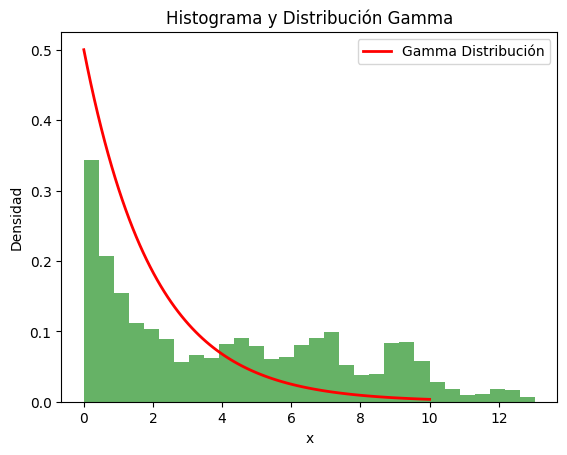

In [33]:
# PASO 7. Obtenga la gráfica y el histograma.

# Graficar histograma y la función
plt.hist(y, bins=30, density=True, alpha=0.6, color='g')

# Crear el rango para la función
xs = np.linspace(0, 10, 100)

# Graficar la función
plt.plot(xs, g(xs, a, b), 'r-', lw=2, label='Gamma Distribución')

plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Histograma y Distribución Gamma')
plt.legend()
plt.show()

In [34]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

media_f = a*b
desviacion_f = math.sqrt(a*b**2)
print("Media analítica:", media_f)
print("Desviación estandar analítica:", desviacion_f)
print("La media es:", np.mean(y))
print("La desviación estandar es:", np.std(y))

Media analítica: 2
Desviación estandar analítica: 2.0
La media es: 4.158419004053256
La desviación estandar es: 3.4103411580580048


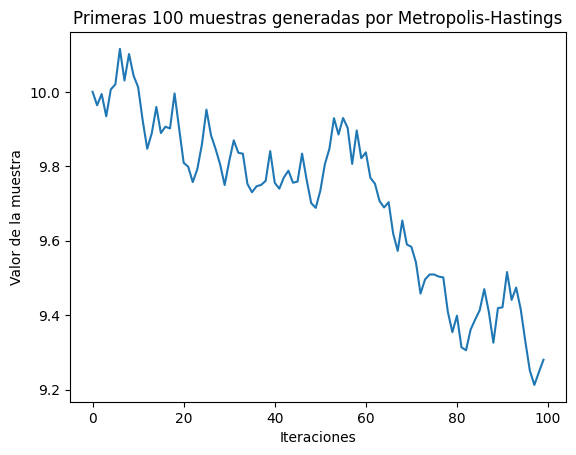

In [35]:
# Gráfico de los primeros 100 valores generados
plt.plot(y[:100])
plt.title('Primeras 100 muestras generadas por Metropolis-Hastings')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la muestra')
plt.show()

# **Distribución Poisson**

**Analiticamente**

$$
p(x)=\frac{e^{-λ}λ^x}{x!}
$$
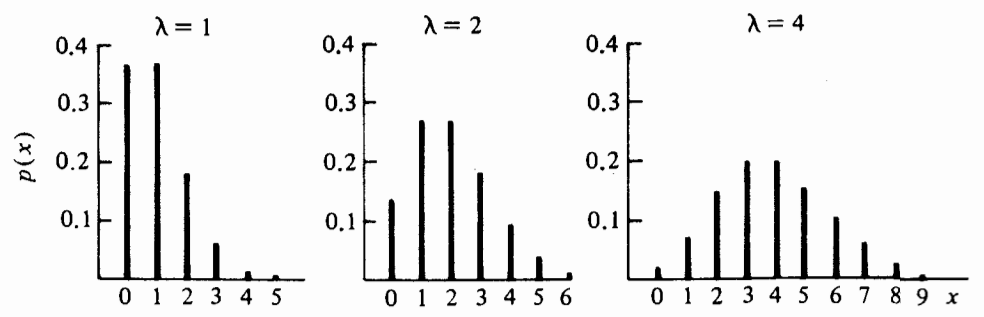

**Simulación**

**Paso 1.** Defina las variables que intervienen en el modelo.

Sea $x$ una variable aleatoria que representa el número de eventos aleatorios independientes que ocurren a una rapidez constante sobre el tiempo o el espacio. Se dice entonces que la variable aleatoria $x$ tiene una distribución de Poisson.

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x) = \left\{
            \begin{array}{ll}
	      \frac{e^{-λ}λ^x}{x!} & \mathrm{si\ } x=0,1,2,...;\hspace{1cm}λ>0 \\
	      0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x)=\sum_{i=0}^x \frac{e^{-λ}λ^i}{i!}
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |     x     |
|-----------|-----------|
| Intervalo | $𝐙^++{0}$ |

In [37]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función y obtener el porcentaje de aceptación.

def p(z, l):
    # Retorna el valor de la función de densidad de probabilidad de la distribución de Poisson
    return (math.exp(-l) * l**z) / math.factorial(z)

# Parámetros
l = 4  # Lambda de la distribución de Poisson
n = 50000  # Número de iteraciones de la simulación
delta = 1  # Paso máximo permitido para el movimiento en la cadena de Markov (para garantizar enteros)
z = np.zeros(n, dtype=int)  # Inicializamos un array de ceros enteros donde almacenaremos las muestras
z[0] = 10  # Valor inicial para la cadena de Markov
acept = 0  # Contador para las aceptaciones

# Bucle para generar muestras mediante el algoritmo de Metropolis-Hastings
for i in range(0, n-1):
    # Propuesta de nuevo valor y usando una distribución uniforme de números enteros en el intervalo (-delta, delta)
    v = z[i] + np.random.randint(-delta, delta+1)

    # Aceptación del nuevo valor usando el criterio de Metropolis-Hastings
    if v >= 0 and np.random.rand() < min(1, p(v, l) / p(z[i], l)):  # v >= 0 porque Poisson no tiene negativos
        z[i+1] = v  # Si el valor es aceptado, se almacena en la siguiente posición
        acept += 1  # Aumenta el contador de aceptaciones
    else:
        z[i+1] = z[i]  # Si no es aceptado, se repite el valor anterior

# Imprimir el porcentaje de aceptación del algoritmo
print("La aceptación fue del ", acept/n*100, "%")

La aceptación fue del  87.072 %


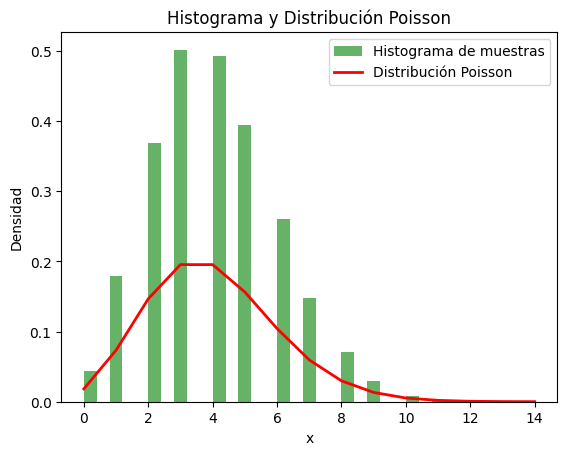

In [39]:
# PASO 7. Obtenga la gráfica y el histograma.

# Graficar el histograma de las muestras generadas
plt.hist(z, bins=30, density=True, alpha=0.6, color='g', label='Histograma de muestras')

# Crear un rango de valores enteros para la función de Poisson
xs = np.arange(0, 15)

# Graficar la función de la distribución de Poisson
poisson_values = [p(x, l) for x in xs]  # Evaluar la función de Poisson para cada valor entero
plt.plot(xs, poisson_values, 'r-', lw=2, label='Distribución Poisson')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Histograma y Distribución Poisson')
plt.legend()
plt.show()

In [40]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

media_f = l
desviacion_f = math.sqrt(l)
print("Media analítica:", media_f)
print("Desviación estandar analítica:", desviacion_f)
print("La media es:", np.mean(z))
print("La desviación estandar es:", np.std(z))

Media analítica: 4
Desviación estandar analítica: 2.0
La media es: 3.96686
La desviación estandar es: 1.935376382102458


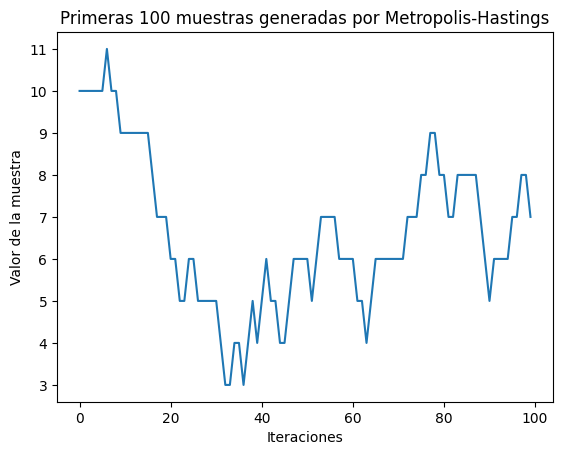

In [41]:
# Gráfico de los primeros 100 valores generados
plt.plot(z[:100])
plt.title('Primeras 100 muestras generadas por Metropolis-Hastings')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de la muestra')
plt.show()